In [1]:
# Importing all needed modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import re

In [97]:
import unicodedata

In [104]:
df = pd.read_csv("NewsArticles_Top10Keywords.csv")
df

,news_id,title,content,link,date
0,1,Do chatbots really help you stay productive?,GUEST: When Slack burst onto the workplace sce...,http://venturebeat.com/?p=2141494,2017-01-01
1,2,Spanish social advertising company Adsmurai ra...,Barcelona-based social advertising company Ads...,http://venturebeat.com/?p=2141069,2017-01-01
2,3,HTC: No Vive 2 at CES,I\u2019d wager most people who bought the HTC ...,http://venturebeat.com/?p=2141559,2017-01-01
3,4,Chinese firms reportedly ordered to pay Disney...,(Reuters) &#8212;\xa0A Shanghai court ordered ...,http://venturebeat.com/?p=2141698,2017-01-01
4,5,AWS sees growth in database migrations,Public cloud market leader Amazon Web Services...,http://venturebeat.com/?p=2141375,2017-01-01
...,...,...,...,...,...
10636,10637,Rocwise’s Soldiers of the Universe shows a Tur...,Soldiers of the Universe isn&#8217;t pretty \u...,https://venturebeat.com/?p=2302950,2017-12-13
10637,10638,Trump signs U.S. government ban on Kaspersky L...,(Reuters) &#8212; President Donald Trump signe...,https://venturebeat.com/?p=2303361,2017-12-13
10638,10639,Nvidia partners with Japan’s Komatsu to make c...,Japanese construction equipment manufacturer K...,https://venturebeat.com/?p=2302735,2017-12-13
10639,10640,Google launches AI Center in China,Google today announced plans to launch the Goo...,https://venturebeat.com/?p=2303370,2017-12-13


In [105]:
# getting the list of stopwords.
english_stopwords = stopwords.words("english")

In [151]:
# First I will clean the text.
def cleaning_text(text):
    text = unicodedata.normalize("NFC", text)
    text = re.sub("&#[0-9]+\s*;", " ", text)
    text = re.sub(u"u[0-9]+", " ",text)
    text = " ".join(word_tokenize(text.lower()))
    selected_tokens = [token for token in text.split() if token not in english_stopwords]
    return " ".join(selected_tokens)

In [152]:
cleaning_text("Google launches AI Center in China")

'google launches ai center china'

In [153]:
df['title_clean'] = df["title"].apply(cleaning_text)

In [154]:
df["title_clean"]

0                   chatbots really help stay productive ?
1        spanish social advertising company adsmurai ra...
2                                         htc : vive 2 ces
3        chinese firms reportedly ordered pay disney , ...
4                      aws sees growth database migrations
                               ...                        
10636    rocwise ’ soldiers universe shows turkish take...
10637    trump signs u.s. government ban kaspersky lab ...
10638    nvidia partners japan ’ komatsu make construct...
10639                      google launches ai center china
10640    $ 177,843.34 facebook ad test : collection vs....
Name: title_clean, Length: 10641, dtype: object

In [155]:
df["content_clean"] = df["content"].apply(cleaning_text)

In [156]:
df["content_clean"]

0        guest : slack burst onto workplace scene , emp...
1        barcelona-based social advertising company ads...
2        i\ wager people bought htc vive love unit wish...
3        ( reuters ) \xa0a shanghai court ordered two c...
4        public cloud market leader amazon web services...
                               ...                        
10636    soldiers universe pretty \ supposed . turkish ...
10637    ( reuters ) president donald trump signed law ...
10638    japanese construction equipment manufacturer k...
10639    google today announced plans launch google ai ...
10640    guest : facebook launched collection ad format...
Name: content_clean, Length: 10641, dtype: object

In [157]:
# Extracting the happaxes.

In [158]:
title_word_frequencies = FreqDist()
for text in df["title_clean"].values:
    title_word_frequencies.update(text.split())

In [159]:
title_word_frequencies.hapaxes()

['adsmurai',
 '194,000',
 'copying',
 'migrations',
 'screw-ups',
 'mp',
 'microsd',
 'slots',
 'univercells',
 'trackr',
 'misplaced',
 'enigmatic',
 'capitalists',
 'gamesbeats',
 'employment',
 'thinkpad',
 '1,350',
 '3drudder',
 'allegedly',
 'hubblo',
 'polar',
 'keyshare',
 'kimon',
 'roost',
 'freezing',
 'docking',
 'type-c',
 'indirect',
 'ganondorf',
 'poles',
 'melody',
 'seiki',
 'westinghouse',
 'tentacle',
 'all-in-one',
 '21-inch',
 '9,000',
 'workstation',
 'fridgecam',
 'expires',
 '15.6-inch',
 '7th-gen',
 '1,280',
 'c731',
 '11-inch',
 '12-hour',
 'genican',
 'specialized',
 'mounting',
 'riot',
 'shields',
 'ante',
 'contingent',
 'transistors',
 '10nm',
 'reliefband',
 'neurowave',
 'soothes',
 'nausea',
 'sensorwake',
 'oria',
 'scents',
 'd-vine',
 'keybaords',
 '929',
 'bloomlife',
 'pregnancy',
 'contractions',
 'airthings',
 'radon',
 'oreal',
 'hairbrush',
 'evabot',
 'madbot',
 'opoid',
 'radbots',
 'younger',
 'g533',
 'meal-planning',
 'ooma',
 'medallion'

In [160]:
content_word_frequencies = FreqDist()
for text in df["content_clean"].values:
    content_word_frequencies.update(text.split())

In [161]:
content_word_frequencies.hapaxes()

['rejoiced',
 'barcelona-based',
 'banc',
 'sabadell',
 'bstartup10',
 'enisa',
 'elena',
 'w\\xfcst',
 'robles',
 'wager',
 'fit\\xa0for\\xa0the',
 'hard-to-reach',
 '194,440',
 'xinhua',
 'ec2',
 'blankly',
 'this\\xa0abyss',
 'clenched',
 'jaw\\xa0lit',
 'not\\xa0even',
 'chronological',
 'talk\\xa0about',
 'with\\xa0twitter',
 'or\\xa0watch\\xa0trump',
 'fuss\\xa0about',
 'vanity',
 'my\\xa0feed',
 'calligraphy',
 'skimpy',
 'remove\\xa0its',
 'bite',
 'squished',
 'bahn',
 'taping',
 'inkling',
 'coupa',
 'talend',
 'showing\\xa0at',
 'a7',
 '5.2-inch',
 'a5',
 '4.7-inch',
 'a3',
 'microsd',
 'hugues',
 'bultot',
 'vaccine',
 'hemorrhaged',
 'sankalp',
 'phartiyal',
 '\\xa0smartphone',
 'fast-tracked',
 'trackr',
 'enrich',
 'a\\xa0big',
 'jobs\\xa0due',
 'issue.\\xa0in',
 'popularist',
 '2017s',
 'normative',
 'outgrowing',
 'outline',
 'cmio',
 'outright',
 'fifth-generation',
 '2.49',
 '3drudder\\xa0wants',
 'foot-powered',
 'moriah',
 'modisette',
 'willhelm',
 'mixtape',
 'da

In [166]:
new_title_corpus = []
for text in df["title_clean"].values:
    temp_text = " ".join([word for word in text.split() if word not in title_word_frequencies.hapaxes()])
    new_title_corpus.append(text)

In [167]:
new_title_corpus

['chatbots really help stay productive ?',
 'spanish social advertising company adsmurai raises $ 4.2 million',
 'htc : vive 2 ces',
 'chinese firms reportedly ordered pay disney , pixar $ 194,000 copying ‘ cars ’',
 'aws sees growth database migrations',
 'new year ’ resolution delete twitter phone',
 'google ’ ai assistant 5 new year ’ resolutions',
 'macbook pro review : lovable despite short battery life',
 '5 deep learning startups follow 2017',
 'bot help airline compensation',
 '5 worst supply chain screw-ups 2016',
 'daydream vr software ’ selling well',
 '31 tech companies could go public 2017',
 '23 new htc vive experiences debut ces',
 'samsung updates galaxy phones 16 mp cameras , water resistance , microsd slots',
 'belgian biotech company univercells awarded $ 12 million grant',
 '5 things could make amazon even stronger 2017',
 'apple ’ india efforts may helped manufacturing partner expansion critical market',
 'dell launches xps 13 2-in-1 laptop intel kaby lake chip , s

In [168]:
# Applieng TF-IDF vectorizing from sklean.

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [170]:
tf_idf = TfidfVectorizer()

In [172]:
X = tf_idf.fit_transform(new_title_corpus)

In [173]:
# Getting the scors of words.
tfidf_dict = dict(zip(tf_idf.get_feature_names_out(), X.toarray().sum(axis=0)))

In [174]:
# sort in the descending oreder.
scores = dict(sorted(tfidf_dict.items(), key=lambda x : x[1], reverse=True))

In [175]:
scores

{'million': 169.62591088839525,
 'ai': 153.33926326365122,
 'new': 132.32323811060152,
 'game': 122.56686771319828,
 'google': 113.73395940324745,
 'raises': 105.14365126293809,
 'vr': 103.19380385991573,
 'launches': 102.22442694147946,
 'microsoft': 83.69970403576313,
 'games': 81.26990022718913,
 'mobile': 80.83050513657078,
 'facebook': 78.31913679024156,
 'tech': 77.27103745413403,
 '2017': 76.37602334931407,
 'apple': 72.17235932545177,
 'amazon': 68.12771177142288,
 '10': 64.38771155455599,
 'app': 63.778343700631154,
 'first': 62.797092476489986,
 'live': 58.56938930525046,
 'nintendo': 58.319242214035356,
 'switch': 58.12761349418604,
 'startup': 57.89090997829173,
 'help': 57.417609198251846,
 'data': 56.737020840758014,
 'one': 56.2555451326594,
 'billion': 53.866192364888455,
 'reality': 53.02117745602795,
 'platform': 52.82682111142793,
 'world': 51.127968262725545,
 'gaming': 50.00086962347314,
 'video': 45.42198107176236,
 'alexa': 45.25641720353917,
 'weekly': 44.460527

In [176]:
# Converting the scores to the data frame.

In [177]:
tf_idf_df = pd.DataFrame.from_dict(tfidf_dict, orient="index", columns=["tfidf"])
tf_idf_df.index = tf_idf_df.index.rename("token")

In [183]:
tf_idf_df.sort_values(by=["tfidf"], ascending=False).head(10)

,tfidf
token,
million,169.625911
ai,153.339263
new,132.323238
game,122.566868
google,113.733959
raises,105.143651
vr,103.193804
launches,102.224427
microsoft,83.699704


In [182]:
# As we can se from the statistical point of view the most importatn words are:
# milion
# ai
# new
# game
# google
# raises
# vr
# launches
# microsoft
# games.

In [187]:
top_10_tf_idf = tf_idf_df.sort_values(by=["tfidf"], ascending=False).head(10)

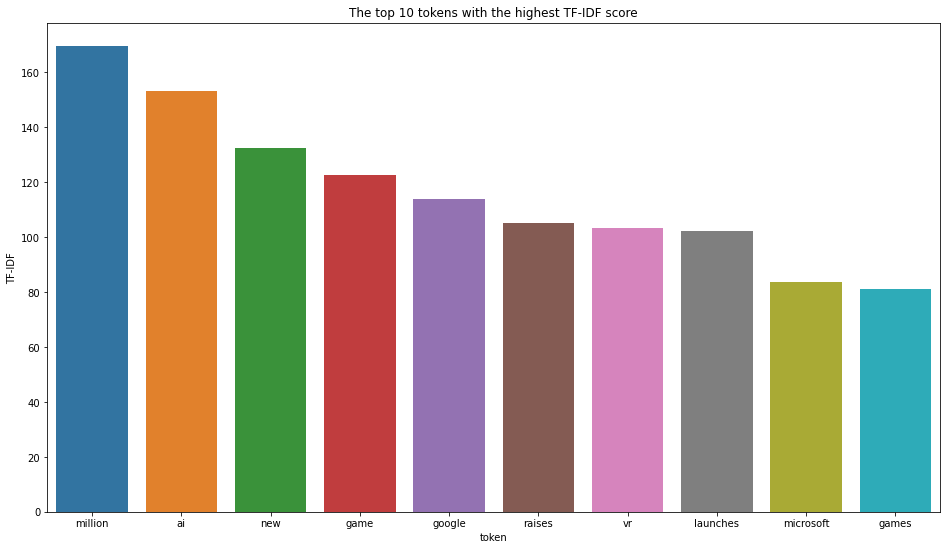

In [200]:
# Creating the plot of the top 10 words by TF-IDF.
fig = plt.figure(figsize=(16, 9))
fig.set_facecolor('white')
sns.barplot(data=top_10_tf_idf, x=top_10_tf_idf.index, y="tfidf")
plt.xlabel("token")
plt.ylabel("TF-IDF")
plt.title("The top 10 tokens with the highest TF-IDF score")
plt.show()

In [202]:
from rake_nltk import Rake

In [203]:
# Creatting the Rake module.
r = Rake()

In [205]:
# For Rake we are going to use the original text because it needs the stopwords to be in text.

In [206]:
title_text = " ".join(df["title"].values)

In [208]:
r.extract_keywords_from_text(title_text)

In [212]:
r.get_ranked_phrases_with_scores()[:10]

[(153.46269875382123,
  '2017 former white house digital media adviser mark deloura wins ambassador award igf awards host expresses sympathy'),
 (152.2518137760791,
  '100 languages \u200b plume \u200b \u200b labs \u200b \u200b launches \u200b \u200b flow ,\u200b \u200b'),
 (148.90948953007776,
  'former financial engines ceo jeff maggioncalda replaces rick levin applied acoustics international names kalyan nadella r'),
 (147.47149522984182,
  'feature closed captioning clarify medical core technology receives fda clearance mountain dew sponsors global esports teams dignitas'),
 (138.769720290873,
  'friendly survey platform mobile ad tech firm glispa acquires playable ads startup justad french diy retailer manomano raises'),
 (136.3508991664288,
  'automatically stabilizes shaky live 360 videos trinity capital investment reports second quarter results hubspot acquires ai startup kemvi'),
 (124.09053827739513,
  'deregulation attempts could hurt tech innovation south korean messaging s